# Redução de dimensionalidade por PCA

In [3]:
import numpy as np
import sys,os
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
ia898path = os.path.abspath('/home/lotufo')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

## Atenção, ler com a função ia.nbread

""
digits_train.png

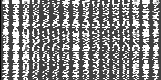

In [4]:
dt = ia.nbread('/home/lotufo/ia898/data/digits_train.png')
ia.adshow(dt, 'digits_train.png')

In [5]:
print(dt.shape)
print(dt.dtype)
print(dt[:3,:20])

(80, 161)
uint8
[[  3  64  64 201 201 255 255 236 201  64  64  64 255 255 255 255 255 255
  255  89]
 [  6  64 156 195 195 255 255 255 225  64  64  64 255 255 255 255 255 255
  255 198]
 [  2  64 237 255 255 255 255 255 255  64  64  64 255 255 255 255 255 255
  255 198]]


## Visualizando o dataset

O dataset é composto de 80 amostras. Cada amostra está organizado como: primeira coluna é o rótulo do dígito, de 0 a 9 e seguida 160 atributos (16 linhas e 10 colunas). O típo é uint8.

In [6]:
nb = ia.nbshow(10)

In [7]:
for i in range(80):
    f = dt[i,1:].reshape(16,10)
    label = dt[i,0]
    nb.nbshow(f,label)
nb.nbshow()

""
3
""
6
""
2
""
8
""
4
""


## Montando o X

In [8]:
X = dt[:,1:].astype(np.float)
print(X.shape)

(80, 160)


## Calculando o PCA

In [16]:
n,_ = X.shape
mu = X.mean(axis=0)

Xc = X - mu               # 0 mean

C = (Xc.T).dot(Xc)/(n-1)        # Covariance matrix
e,V = np.linalg.eigh(C)       # eigenvalues and eigenvectors of the covariance matrix        
indexes = np.argsort(e)[::-1] # sorting eigenvalues from largest  
e  = e [indexes]              # update e and V
V = V[:,indexes]

(160,)


## Transformando para média 0 e covariância na diagonal apenas

In [10]:
Xr = (X - mu).dot(V)
Xrm = Xr.mean(axis=0)
Xrm[Xrm<1e-10] = 0
print('Média das novas amostras:\n',Xrm)

Cr= np.cov(Xr,rowvar=False)
Cr[Cr<1e-10] = 0
print('\n Matriz de covariância dos seis primeiros atributos:\n',Cr[:6,:6].round(2))



Média das novas amostras:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

 Matriz de covariância dos seis primeiros atributos:
 [[ 190995.81       0.         0.         0.         0.         0.  ]
 [      0.    117444.14       0.         0.         0.         0.  ]
 [      0.         0.     74035.84       0.         0.         0.  ]
 [      0.         0.         0.     49854.94       0.       

## Reduzindo a dimensionalidade para 2

In [27]:
Y = Xr[:,:2]

## Plotando as amostras gráfico bidimensional com cor para cada rótulo

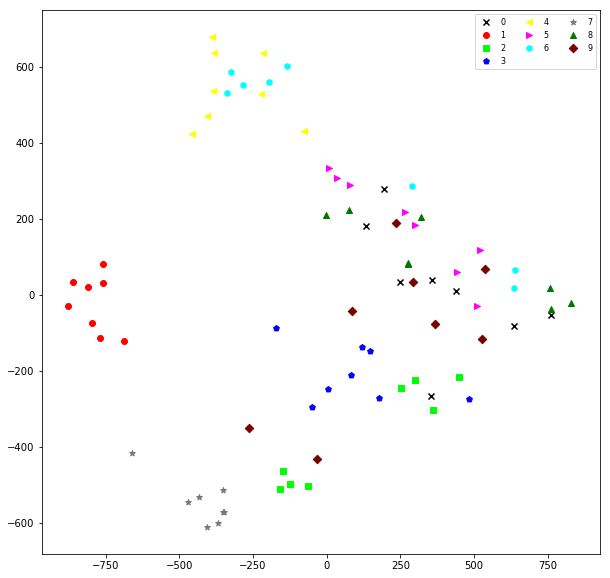

In [28]:
label = dt[:,0]

Y0 = Y[label==0]
Y1 = Y[label==1]
Y2 = Y[label==2]
Y3 = Y[label==3]
Y4 = Y[label==4]
Y5 = Y[label==5]
Y6 = Y[label==6]
Y7 = Y[label==7]
Y8 = Y[label==8]
Y9 = Y[label==9]

colors = ['#000000', '#FF0000', '#00FF00', '#0000FF', '#FFFF00',
          '#FF00FF', '#00FFFF', '#777777', '#007700', '#770000']

plt.figure(figsize=(10,10))
pl0 = plt.scatter(Y0[:,0], Y0[:,1], marker='x', color=colors[0])
pl1 = plt.scatter(Y1[:,0], Y1[:,1], marker='o', color=colors[1])
pl2 = plt.scatter(Y2[:,0], Y2[:,1], marker='s', color=colors[2])
pl3 = plt.scatter(Y3[:,0], Y3[:,1], marker='p', color=colors[3])
pl4 = plt.scatter(Y4[:,0], Y4[:,1], marker='<', color=colors[4])
pl5 = plt.scatter(Y5[:,0], Y5[:,1], marker='>', color=colors[5])
pl6 = plt.scatter(Y6[:,0], Y6[:,1], marker='h', color=colors[6])
pl7 = plt.scatter(Y7[:,0], Y7[:,1], marker='*', color=colors[7])
pl8 = plt.scatter(Y8[:,0], Y8[:,1], marker='^', color=colors[8])
pl9 = plt.scatter(Y9[:,0], Y9[:,1], marker='D', color=colors[9])

plt.legend((pl0, pl1, pl2, pl3, pl4, pl5, pl6, pl7, pl8, pl9),
           ('0', '1', '2', '3', '4', '5', '6', '7', '8' , '9'),
           loc='best',
           ncol=3,
           fontsize=8)

plt.show()

## Reconstrução parcial

In [36]:
Ypr = np.zeros_like(Xr)
Ypr[:,:2]=Y
Xpr = Ypr.dot(V.T) + mu
Xpr = ia.normalize(Xpr)

nb = ia.nbshow(10)
for i in range(80):
    f = Xpr[i,:].reshape(16,10)
    label = dt[i,0]
    nb.nbshow(f,label)
nb.nbshow()


""
3
""
6
""
2
""
8
""
4
""
